In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get data ConsumptionDE35Hour full 2.994.932 rows

In [2]:
# import requests
# import csv

# # Fetch the data from the API
# response = requests.get(
#     url='https://api.energidataservice.dk/dataset/ConsumptionDE35Hour?limit=2994932'
# )
# result = response.json()

# # Extract records from the response
# records = result.get('records', [])

# # Define the CSV file path
# csv_file_path = '/kaggle/working/ConsumptionDE35Hour.csv'

# # Write records to the CSV file
# with open(csv_file_path, mode='w', newline='') as file:
#     writer = csv.writer(file)
    
#     # Write the header
#     if records:
#         header = records[0].keys()
#         writer.writerow(header)
    
#     # Write the data
#     for record in records:
#         writer.writerow(record.values())

# print(f'Data has been written to {csv_file_path}')

## Get data ConsumptionDK3619codehour full 3.533.984 rows

In [3]:
# import requests
# import csv

# # Fetch the data from the API
# response = requests.get(
#     url='https://api.energidataservice.dk/dataset/ConsumptionDK3619codehour?limit=3533984'
# )
# result = response.json()

# # Extract records from the response
# records = result.get('records', [])

# # Define the CSV file path
# csv_file_path = '/kaggle/working/ConsumptionDK3619codehour.csv'

# # Write records to the CSV file
# with open(csv_file_path, mode='w', newline='') as file:
#     writer = csv.writer(file)
    
#     # Write the header
#     if records:
#         header = records[0].keys()
#         writer.writerow(header)
    
#     # Write the data
#     for record in records:
#         writer.writerow(record.values())

# print(f'Data has been written to {csv_file_path}')

In [4]:
# # load the data
# filepath = '/kaggle/input/consumption-energy-denmark/Dataset_ConsumptionDE35Hour.csv'
# df_full_de35 = pd.read_csv(filepath, delimiter=',')

# load the data
filepath = '/kaggle/input/consumption-energy-denmark/Dataset_ConsumptionDK3619codehour.csv'
df_full_dk3619 = pd.read_csv(filepath, delimiter=',')

In [5]:
# import pandas as pd

# # Kiểm tra dữ liệu trùng lặp
# duplicates = df_full_de35[df_full_de35.duplicated()]
# print("Duplicate rows:")
# print(duplicates)

# # Kiểm tra các giá trị thiếu trong cột 'HourDK'
# missing_hourdk = df_full_de35[df_full_de35['HourDK'].isnull()]
# print("Rows with missing HourDK:")
# print(missing_hourdk)

# # Kiểm tra các giá trị NaN trong toàn bộ DataFrame
# nan_values = df_full_de35.isnull().sum()
# print("Number of NaN values in each column:")
# print(nan_values)

In [6]:
# # Show the first few rows of the dataframe
# print(df_full_de35.head())
# # Display the dataframe info to confirm
# print(df_full_de35.info())

# Show the first few rows of the dataframe
print(df_full_dk3619)
# Display the dataframe info to confirm
print(df_full_dk3619.info(show_counts = True))

                     HourUTC               HourDK  DK36Code  \
0        2024-06-21T21:00:00  2024-06-21T23:00:00         A   
1        2024-06-21T21:00:00  2024-06-21T23:00:00         B   
2        2024-06-21T21:00:00  2024-06-21T23:00:00        CA   
3        2024-06-21T21:00:00  2024-06-21T23:00:00        CC   
4        2024-06-21T21:00:00  2024-06-21T23:00:00  CE_CF_CD   
...                      ...                  ...       ...   
3533979  2012-06-02T00:00:00  2012-06-02T02:00:00         S   
3533980  2012-06-02T00:00:00  2012-06-02T02:00:00         X   
3533981  2012-06-01T23:00:00  2012-06-02T01:00:00       NaN   
3533982  2012-06-01T23:00:00  2012-06-02T01:00:00  CE_CF_CD   
3533983  2012-06-01T23:00:00  2012-06-02T01:00:00        MA   

                                                 DK36Title DK19Code  \
0                            Landbrug, skovbrug og fiskeri        A   
1                                         Råstofindvinding        B   
2                     Føde-, d

In [7]:
df = df_full_dk3619

In [8]:
import pandas as pd

# Giả sử df đã được tải và có sẵn trong biến df

# Giá trị cần loại bỏ
values_to_remove = ['X', 'B']

# Xóa các hàng có giá trị ở cột DK36Code là 'X', 'B' hoặc NaN
df_cleaned = df[~df['DK36Code'].isin(values_to_remove) & df['DK36Code'].notna()]

# In ra 30 dòng đầu tiên để kiểm tra
print(df_cleaned.info(show_counts = True))


<class 'pandas.core.frame.DataFrame'>
Index: 3323747 entries, 0 to 3533983
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   HourUTC          3323747 non-null  object 
 1   HourDK           3323747 non-null  object 
 2   DK36Code         3323747 non-null  object 
 3   DK36Title        3323747 non-null  object 
 4   DK19Code         3323747 non-null  object 
 5   DK19Title        3323747 non-null  object 
 6   Consumption_MWh  3323747 non-null  float64
dtypes: float64(1), object(6)
memory usage: 202.9+ MB
None


In [9]:
df = df_cleaned

In [10]:
import pandas as pd

# Giả sử df đã được tải và có sẵn trong biến df

# Tạo cột DK3619Code bằng cách gộp các giá trị từ các cột DK36Code và DK19Code với dấu gạch dưới '_'
df['DK3619Code'] = df['DK19Code'].astype(str) + '_' + df['DK36Code'].astype(str)

# In ra các giá trị duy nhất trong cột DK3619Code để kiểm tra
print(df['DK3619Code'].unique())

['A_A' 'C_CA' 'C_CC' 'C_CE_CF_CD' 'C_CG' 'C_CH' 'C_CI' 'C_CJ' 'C_CK'
 'C_CL' 'C_CM_CB' 'D_D' 'E_E' 'F_F' 'G_G' 'H_H' 'I_I' 'J_JA' 'J_JB_JC'
 'K_K' 'L_L' 'M_MA' 'M_MB' 'M_MC' 'N_N' 'O_O' 'P_P' 'PR_PR' 'Q_QA' 'Q_QB'
 'R_R' 'S_S']


/tmp/ipykernel_18/4084715484.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DK3619Code'] = df['DK19Code'].astype(str) + '_' + df['DK36Code'].astype(str)


In [11]:
print(df.info(show_counts = True))

<class 'pandas.core.frame.DataFrame'>
Index: 3323747 entries, 0 to 3533983
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   HourUTC          3323747 non-null  object 
 1   HourDK           3323747 non-null  object 
 2   DK36Code         3323747 non-null  object 
 3   DK36Title        3323747 non-null  object 
 4   DK19Code         3323747 non-null  object 
 5   DK19Title        3323747 non-null  object 
 6   Consumption_MWh  3323747 non-null  float64
 7   DK3619Code       3323747 non-null  object 
dtypes: float64(1), object(7)
memory usage: 228.2+ MB
None


In [12]:
# import pandas as pd

# # Giả sử df đã được tải và có sẵn trong biến df

# # Đảm bảo cột HourDK đã được chuyển sang định dạng datetime
# df['HourDK'] = pd.to_datetime(df['HourDK'])

# # Định nghĩa khoảng thời gian cần lọc
# start_date = '2020-12-31T00:00:00'
# end_date = '2021-01-01T23:00:00'

# # Lọc dữ liệu trong khoảng thời gian
# filtered_df = df[(df['HourDK'] >= start_date) & (df['HourDK'] <= end_date)]

# # Xuất dữ liệu đã lọc ra file CSV
# filtered_df.to_csv('filtered_data.csv', index=False)

# print("Dữ liệu đã được xuất ra file filtered_data.csv")


In [13]:
# # Đếm số lần xuất hiện của các giá trị trong cột find_null_data
# value_counts = filtered_df['find_null_data'].value_counts()

# # In kết quả
# print(value_counts)

In [14]:
# # Các giá trị cụ thể cần lọc
# values_to_filter = [
#     #'X_Uoplyst aktivitet_X_Uoplyst aktivitet',
#     #'B_Råstofindvinding_B_Råstofindvinding',
#     'nan_nan_nan_nan'
# ]

# # Lọc các hàng có giá trị trong cột find_null_data thuộc danh sách values_to_filter
# filtered_values_df = filtered_df[filtered_df['find_null_data'].isin(values_to_filter)]

# # In ra các hàng đã lọc
# print(filtered_values_df)

In [15]:
# # Các giá trị cụ thể cần lọc
# values_to_filter = [
#     'X_Uoplyst aktivitet_X_Uoplyst aktivitet',
#     #'B_Råstofindvinding_B_Råstofindvinding',
#     #'nan_nan_nan_nan'
# ]

# # Lọc các hàng có giá trị trong cột find_null_data thuộc danh sách values_to_filter
# filtered_values_df = filtered_df[filtered_df['find_null_data'].isin(values_to_filter)]

# filtered_values_df['Consumption_MWh'].describe()

In [16]:
# # Các giá trị cụ thể cần lọc
# values_to_filter = [
#     #'X_Uoplyst aktivitet_X_Uoplyst aktivitet',
#     'B_Råstofindvinding_B_Råstofindvinding',
#     #'nan_nan_nan_nan'
# ]

# # Lọc các hàng có giá trị trong cột find_null_data thuộc danh sách values_to_filter
# filtered_values_df = filtered_df[filtered_df['find_null_data'].isin(values_to_filter)]

# filtered_values_df['Consumption_MWh'].describe()

In [17]:
# # Các giá trị cụ thể cần lọc
# values_to_filter = [
#     #'X_Uoplyst aktivitet_X_Uoplyst aktivitet',
#     #'B_Råstofindvinding_B_Råstofindvinding',
#     'nan_nan_nan_nan'
# ]

# # Lọc các hàng có giá trị trong cột find_null_data thuộc danh sách values_to_filter
# filtered_values_df = filtered_df[filtered_df['find_null_data'].isin(values_to_filter)]

# filtered_values_df['Consumption_MWh'].describe()

In [18]:
import pandas as pd

# Đảm bảo cột HourDK đã được chuyển sang định dạng datetime
df['HourDK'] = pd.to_datetime(df['HourDK'])

# Sắp xếp dataframe ngược lại theo cột HourDK
df = df.sort_values(by='HourDK')

# In ra 30 dòng đầu tiên để kiểm tra
print(df.head(30))

/tmp/ipykernel_18/2137082412.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HourDK'] = pd.to_datetime(df['HourDK'])


                     HourUTC              HourDK  DK36Code  \
3533983  2012-06-01T23:00:00 2012-06-02 01:00:00        MA   
3533982  2012-06-01T23:00:00 2012-06-02 01:00:00  CE_CF_CD   
3533978  2012-06-02T00:00:00 2012-06-02 02:00:00         R   
3533979  2012-06-02T00:00:00 2012-06-02 02:00:00         S   
3533949  2012-06-02T00:00:00 2012-06-02 02:00:00         A   
3533950  2012-06-02T00:00:00 2012-06-02 02:00:00        CA   
3533951  2012-06-02T00:00:00 2012-06-02 02:00:00        CC   
3533952  2012-06-02T00:00:00 2012-06-02 02:00:00  CE_CF_CD   
3533953  2012-06-02T00:00:00 2012-06-02 02:00:00        CG   
3533954  2012-06-02T00:00:00 2012-06-02 02:00:00        CH   
3533955  2012-06-02T00:00:00 2012-06-02 02:00:00        CI   
3533957  2012-06-02T00:00:00 2012-06-02 02:00:00        CK   
3533958  2012-06-02T00:00:00 2012-06-02 02:00:00        CL   
3533959  2012-06-02T00:00:00 2012-06-02 02:00:00     CM_CB   
3533960  2012-06-02T00:00:00 2012-06-02 02:00:00         D   
3533961 

In [19]:
#Test holidays function
from datetime import date 
import holidays 
  
# Select country 
uk_holidays = holidays.Denmark() 
  
# Print all the holidays in UnitedKingdom in year 2018 
for ptr in holidays.Denmark(years = 2024).items(): 
    print(ptr) 

(datetime.date(2024, 1, 1), 'Nytårsdag')
(datetime.date(2024, 3, 28), 'Skærtorsdag')
(datetime.date(2024, 3, 29), 'Langfredag')
(datetime.date(2024, 3, 31), 'Påskedag')
(datetime.date(2024, 4, 1), 'Anden påskedag')
(datetime.date(2024, 5, 9), 'Kristi himmelfartsdag')
(datetime.date(2024, 5, 19), 'Pinsedag')
(datetime.date(2024, 5, 20), 'Anden pinsedag')
(datetime.date(2024, 12, 25), 'Juledag')
(datetime.date(2024, 12, 26), 'Anden juledag')


In [20]:
import pandas as pd
import holidays

def process_df(df):
    # Convert HourDK to datetime format
    df['HourDK'] = pd.to_datetime(df['HourDK'])

    # Thêm các biến thời gian
    df['hour'] = df['HourDK'].dt.hour
    df['day_of_week'] = df['HourDK'].dt.dayofweek
    df['weekday_name'] = df['HourDK'].dt.day_name()
    df['quarter'] = df['HourDK'].dt.quarter
    df['month'] = df['HourDK'].dt.month
    df['year'] = df['HourDK'].dt.year
    df['day_of_year'] = df['HourDK'].dt.dayofyear
    df['day_of_month'] = df['HourDK'].dt.day
    df['week_of_year'] = df['HourDK'].dt.isocalendar().week

    # Định nghĩa hàm để gom nhóm các tháng thành mùa
    def season_group(month):
        if month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        elif month in [9, 10, 11]:
            return 'Autumn'
        else:
            return 'Winter'

    # Áp dụng hàm season_group để tạo cột Season
    df['season'] = df['month'].apply(season_group)

    # Thiết lập các ngày nghỉ tại Đan Mạch cho nhiều năm
    dk_holidays = holidays.Denmark(years=df['year'].unique())

    # Tạo cột Holiday dựa trên ngày nghỉ
    df['holiday'] = df['HourDK'].apply(lambda x: 1 if x in dk_holidays else 0)

    # Đưa các cột thời gian mới tạo vào đúng vị trí bên phải cột HourDK
    cols = list(df.columns)
    hourdk_index = cols.index('HourDK')
    new_cols = cols[:hourdk_index+1] + cols[-12:] + cols[hourdk_index+1:-12]
    df = df[new_cols]
    
    return df

In [21]:
# Sử dụng hàm process_df với DataFrame đầu vào của bạn
df_processed_time = process_df(df)
print(df_processed_time.head())
print(df_processed_time.info())

                     HourUTC              HourDK  DK3619Code  hour  \
3533983  2012-06-01T23:00:00 2012-06-02 01:00:00        M_MA     1   
3533982  2012-06-01T23:00:00 2012-06-02 01:00:00  C_CE_CF_CD     1   
3533978  2012-06-02T00:00:00 2012-06-02 02:00:00         R_R     2   
3533979  2012-06-02T00:00:00 2012-06-02 02:00:00         S_S     2   
3533949  2012-06-02T00:00:00 2012-06-02 02:00:00         A_A     2   

         day_of_week weekday_name  quarter  month  year  day_of_year  \
3533983            5     Saturday        2      6  2012          154   
3533982            5     Saturday        2      6  2012          154   
3533978            5     Saturday        2      6  2012          154   
3533979            5     Saturday        2      6  2012          154   
3533949            5     Saturday        2      6  2012          154   

         day_of_month  week_of_year  season  holiday  DK36Code  \
3533983             2            22  Summer        0        MA   
3533982       

In [22]:
import pandas as pd

def create_lag_columns(df):
    # Sắp xếp lại dataframe theo cột HourDK nếu cần thiết
    df['HourDK'] = pd.to_datetime(df['HourDK'])
    df_sorted = df.sort_values(by='HourDK')

    # Tạo các cột lag từ 24 đến 48 tiếng cho từng mã DK36Code
    lag_columns = range(24, 49)
    for lag in lag_columns:
        lag_col = f'lag_{lag}'
        df_sorted[lag_col] = df_sorted.groupby('DK36Code')['Consumption_MWh'].shift(lag)

    return df_sorted

In [23]:
df_processed = create_lag_columns(df_processed_time)
print(df_processed.head())
print(df_processed.info())

                     HourUTC              HourDK  DK3619Code  hour  \
3533983  2012-06-01T23:00:00 2012-06-02 01:00:00        M_MA     1   
3533982  2012-06-01T23:00:00 2012-06-02 01:00:00  C_CE_CF_CD     1   
3533963  2012-06-02T00:00:00 2012-06-02 02:00:00         G_G     2   
3533976  2012-06-02T00:00:00 2012-06-02 02:00:00        Q_QA     2   
3533975  2012-06-02T00:00:00 2012-06-02 02:00:00         P_P     2   

         day_of_week weekday_name  quarter  month  year  day_of_year  ...  \
3533983            5     Saturday        2      6  2012          154  ...   
3533982            5     Saturday        2      6  2012          154  ...   
3533963            5     Saturday        2      6  2012          154  ...   
3533976            5     Saturday        2      6  2012          154  ...   
3533975            5     Saturday        2      6  2012          154  ...   

         lag_39  lag_40 lag_41  lag_42 lag_43 lag_44 lag_45 lag_46  lag_47  \
3533983     NaN     NaN    NaN     NaN

In [24]:
df_processed[df_processed['DK36Code'] == 'MA'].head(30)[['HourDK', 'DK36Code', 'lag_24', 'lag_25', 'lag_26']]

,HourDK,DK36Code,lag_24,lag_25,lag_26
3533983,2012-06-02 01:00:00,MA,NaN,NaN,NaN
3533970,2012-06-02 02:00:00,MA,NaN,NaN,NaN
3533937,2012-06-02 03:00:00,MA,NaN,NaN,NaN
3533904,2012-06-02 04:00:00,MA,NaN,NaN,NaN
3533871,2012-06-02 05:00:00,MA,NaN,NaN,NaN
3533838,2012-06-02 06:00:00,MA,NaN,NaN,NaN
3533805,2012-06-02 07:00:00,MA,NaN,NaN,NaN
3533772,2012-06-02 08:00:00,MA,NaN,NaN,NaN
3533739,2012-06-02 09:00:00,MA,NaN,NaN,NaN
3533706,2012-06-02 10:00:00,MA,NaN,NaN,NaN


In [25]:
df_processed[df_processed['DK36Code'] == 'A'].tail(10)[['HourDK', 'DK36Code', 'lag_24', 'lag_25', 'lag_26']]

,HourDK,DK36Code,lag_24,lag_25,lag_26
306,2024-06-21 14:00:00,A,168.793935,171.697648,166.379210
272,2024-06-21 15:00:00,A,165.697301,168.793935,171.697648
238,2024-06-21 16:00:00,A,167.568061,165.697301,168.793935
204,2024-06-21 17:00:00,A,171.357029,167.568061,165.697301
170,2024-06-21 18:00:00,A,169.617359,171.357029,167.568061
136,2024-06-21 19:00:00,A,164.658720,169.617359,171.357029
102,2024-06-21 20:00:00,A,162.319310,164.658720,169.617359
68,2024-06-21 21:00:00,A,158.676061,162.319310,164.658720
34,2024-06-21 22:00:00,A,154.584413,158.676061,162.319310
0,2024-06-21 23:00:00,A,147.836362,154.584413,158.676061


In [26]:
# Xuất DataFrame count_stats thành file CSV
df_processed.to_csv('/kaggle/working/dataset_dk3619_preprocessed_v1.csv', index=False)

In [27]:
print(df_processed['year'].unique())

[2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]


In [28]:
dk36title = df_processed['DK36Title'].unique()
dk19title = df_processed['DK19Title'].unique()
print(dk36title)
print(dk19title)

['Rådgivning mv.' 'Kemiskindustri, Olieraffinaderier og Medicinalindustri'
 'Handel' 'Sundhedsvæsen' 'Undervisning'
 'Offentlig administration, forsvar og politi'
 'Reklame og øvrig erhvervsservice' 'Forskning og udvikling'
 'Sociale institutioner' 'Ejendomshandel og udlejning'
 'Finansiering og forsikring'
 'Telekommunikation &It - og informationstjenester' 'Forlag, tv og radio'
 'Hoteller og restauranter' 'Transport' 'Fremst. af elektrisk udstyr'
 'Rejsebureauer, rengøring og anden operationel service'
 'Vandforsyning og renovation' 'Bygge og anlæg'
 'Andre serviceydelser  mv.' 'Landbrug, skovbrug og fiskeri'
 'Føde-, drikke- og tobaksvareindustri'
 'Træ- og papirindustri, trykkerier' 'Plast-, glas- og betonindustri'
 'Kultur og fritid' 'Elektronikindustri' 'Maskinindustri'
 'Transportmiddelindustri'
 'Tekstil - og læderindustri & Møbel og anden industri mv.'
 'Energiforsyning' 'Metalindustri' 'Privat']
['Videnservice' 'Industri' 'Handel' 'Sundhed og socialvæsen'
 'Undervisning' 'Off

In [29]:
import numpy as np

# Giả sử df_processed là DataFrame của bạn
# Lấy các unique values của cột DK36Title và DK19Title, bỏ qua giá trị nan
dk36title = df_processed['DK36Title'].dropna().unique()
dk19title = df_processed['DK19Title'].dropna().unique()

# Chuyển các unique values thành mảng numpy
dk36title_array = np.array(dk36title)
dk19title_array = np.array(dk19title)

# Tìm các phần tử chỉ có trong dk36title_array mà không có trong dk19title_array
unique_dk36title = np.setdiff1d(dk36title_array, dk19title_array)

# Tìm các phần tử chỉ có trong dk19title_array mà không có trong dk36title_array
unique_dk19title = np.setdiff1d(dk19title_array, dk36title_array)

# Kết quả
print("Các phần tử chỉ có trong dk36title_array mà không có trong dk19title_array:")
print(unique_dk36title)

print("\nCác phần tử chỉ có trong dk19title_array mà không có trong dk36title_array:")
print(unique_dk19title)


Các phần tử chỉ có trong dk36title_array mà không có trong dk19title_array:
['Andre serviceydelser  mv.' 'Elektronikindustri' 'Forlag, tv og radio'
 'Forskning og udvikling' 'Fremst. af elektrisk udstyr'
 'Føde-, drikke- og tobaksvareindustri'
 'Kemiskindustri, Olieraffinaderier og Medicinalindustri' 'Maskinindustri'
 'Metalindustri' 'Plast-, glas- og betonindustri'
 'Reklame og øvrig erhvervsservice' 'Rådgivning mv.'
 'Sociale institutioner' 'Sundhedsvæsen'
 'Tekstil - og læderindustri & Møbel og anden industri mv.'
 'Telekommunikation &It - og informationstjenester'
 'Transportmiddelindustri' 'Træ- og papirindustri, trykkerier']

Các phần tử chỉ có trong dk19title_array mà không có trong dk36title_array:
['Andre serviceydelser mv' 'Industri' 'Information og kommunikation'
 'Sundhed og socialvæsen' 'Videnservice']


In [30]:
col_processed = ['DK36Code', 'DK19Code']
df_stats = df_processed.groupby(col_processed)['Consumption_MWh'].agg(['mean', 'min', 'max', 'std', 'sum']).reset_index()
print("df Statistics:")
print(df_stats)

df Statistics:
    DK36Code DK19Code        mean        min          max         std  \
0          A        A  154.675343  11.824183   347.612299   69.081704   
1         CA        C  180.123194  17.932318   337.977356   61.166571   
2         CC        C   44.381744   3.616645    93.227791   18.754005   
3   CE_CF_CD        C  157.103540   8.836999   223.284897   25.345416   
4         CG        C  108.528431   8.873151   201.983307   43.667007   
5         CH        C   84.540892   4.106684   194.267532   45.730394   
6         CI        C    7.051252   0.548322    15.867881    2.963885   
7         CJ        C    9.534243   0.078813    20.109194    3.954460   
8         CK        C   46.835179   3.957120   111.185806   23.086160   
9         CL        C    7.100673   0.368000    18.912756    3.632762   
10     CM_CB        C   37.374338   2.573857    85.469142   17.032363   
11         D        D  169.686098   4.632011  1609.591810  169.281546   
12         E        E   68.202654   

In [31]:
print(df_stats['DK36Code'].unique())
print(df_stats['DK19Code'].unique())

['A' 'CA' 'CC' 'CE_CF_CD' 'CG' 'CH' 'CI' 'CJ' 'CK' 'CL' 'CM_CB' 'D' 'E'
 'F' 'G' 'H' 'I' 'JA' 'JB_JC' 'K' 'L' 'MA' 'MB' 'MC' 'N' 'O' 'P' 'PR' 'QA'
 'QB' 'R' 'S']
['A' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'PR' 'Q' 'R'
 'S']


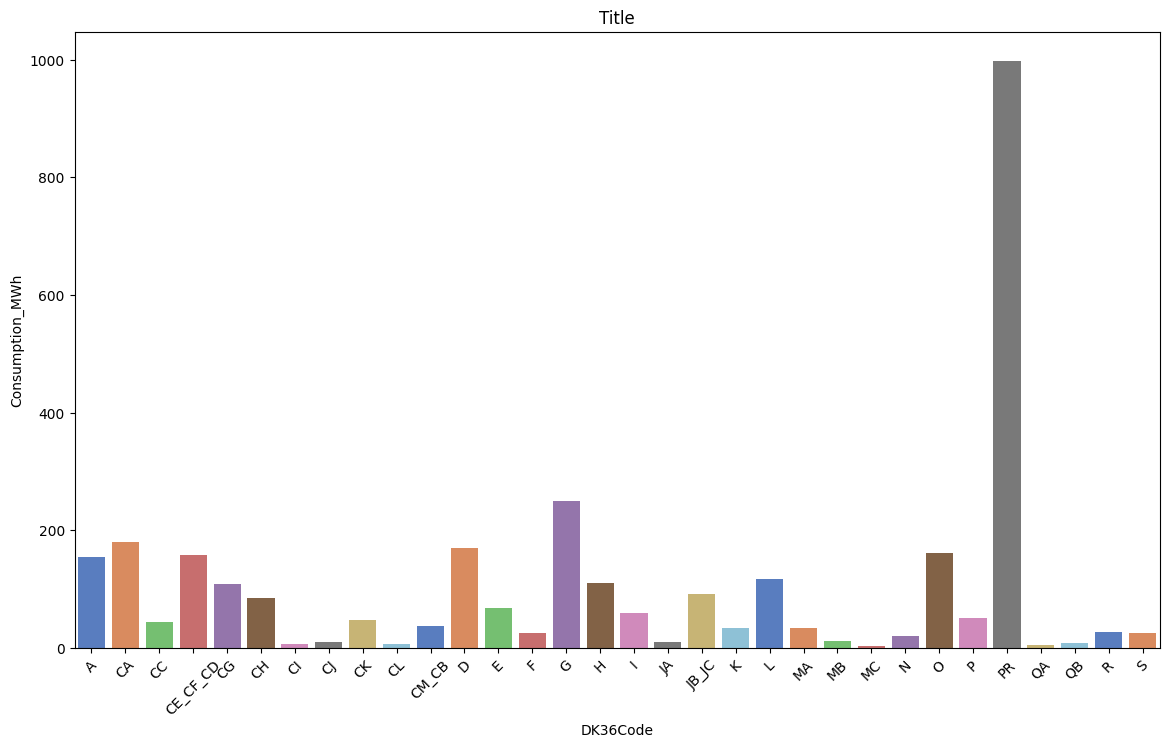

In [32]:
# Sort df_stats by 'mean' in descending order
#df_stats_sorted = df_stats.sort_values(by='mean', ascending=False)

plt.figure(figsize=(14, 8))
# Create barplot with 95% CI error bars
sns.barplot(x='DK36Code', y='mean', data=df_stats, palette='muted', order=df_stats['DK36Code'])
plt.xlabel('DK36Code')
plt.ylabel('Consumption_MWh')
plt.title('Title')
#plt.legend(title='ConsumerType', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

In [33]:
col_processed = ['DK36Code', 'weekday_name']
daily_stats = df_processed.groupby(col_processed)['Consumption_MWh'].agg(['mean', 'min', 'max', 'std', 'sum']).reset_index()
print("df Statistics:")
print(daily_stats)

df Statistics:
    DK36Code weekday_name        mean        min         max        std  \
0          A       Friday  155.807040  12.195354  347.612299  69.756938   
1          A       Monday  156.350421  11.824183  337.785184  69.786493   
2          A     Saturday  150.118301  11.949826  328.435014  66.784581   
3          A       Sunday  148.806007  12.053446  322.002112  66.102274   
4          A     Thursday  157.489421  12.199611  339.942157  70.660652   
..       ...          ...         ...        ...         ...        ...   
219        S     Saturday   21.131132   2.196148   76.967255  11.552586   
220        S       Sunday   20.894048   4.123515   78.070992  11.859332   
221        S     Thursday   26.708709   2.148136   85.312363  14.832852   
222        S      Tuesday   26.556197   4.504835   74.462564  14.621384   
223        S    Wednesday   26.626916   4.461285   72.788203  14.682229   

              sum  
0    2.352063e+06  
1    2.360266e+06  
2    2.265886e+06  
3   

In [34]:
def plot_lineplot(stats_df, x_col, title, xlabel):
    plt.figure(figsize=(14, 8))
    
    # Plot lines for each ConsumerType_DE35
    for consumer_type in stats_df['DK36Code'].unique():
        subset = stats_df[stats_df['DK36Code'] == consumer_type]
        plt.plot(subset[x_col], subset['mean'], marker='o', label=f'ConsumerType_DE35 {consumer_type}')
    
    plt.xlabel(xlabel)
    plt.ylabel('Consumption_MWh')
    plt.title(title)
    plt.legend(title='DK36Code', loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)
    plt.show()

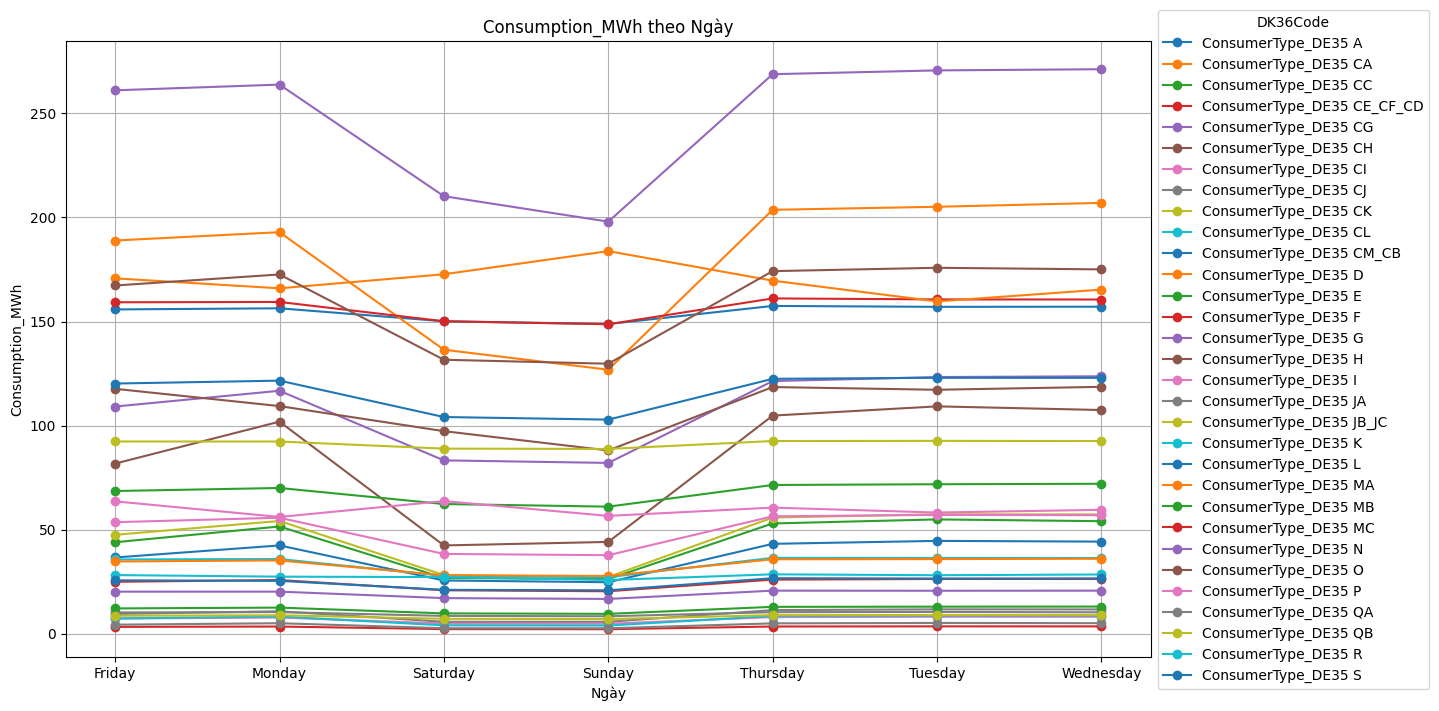

In [35]:
col_processed = ['DK36Code', 'weekday_name']
daily_stats = df_processed.groupby(col_processed)['Consumption_MWh'].agg(['mean', 'min', 'max', 'std', 'sum']).reset_index()
# Filter out ConsumerType_DE35 = 999
daily_stats = daily_stats[daily_stats['DK36Code'] != 'PR']
# Example usage
# Assuming stats_df contains your grouped statistics DataFrame
plot_lineplot(daily_stats, 'weekday_name', 'Consumption_MWh theo Ngày', 'Ngày')